In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.grid import Boxes
from src.read_data import read_data
import dytop.Grid as Grid
import dytop.CMGDB_util as CMGDB_util
import CMGDB

In [3]:
# smooth data
init_data = read_data('vp_ic11all.dat')
next_data = read_data('vp_next11all.dat')

# non-smooth data
# init_data = read_data('vel_phase_ic.dat')
# next_data = read_data('vel_phase_next.dat')

X = init_data[:, [0, 1]]
Y = next_data[:, [0, 1]]


#print(Y[:15])
#Y[:, 0] = Y[:, 0] % (2 * np.pi)

init_impact_velocity = init_data[:, 0]
init_impact_phase = init_data[:, 1]
next_impact_phase = Y[:, 0]
next_impact_velocity = Y[:, 1]


In [3]:
plot_data = True

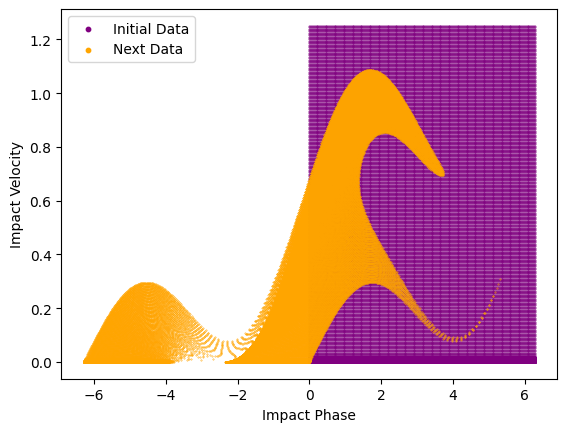

In [4]:
if plot_data: 
    plt.scatter(X[:,0], X[:,1], c='purple', s = 0.1, label='Initial Data')
    plt.scatter(Y[:,0], Y[:,1], c='orange', s = 0.1, label='Next Data')
    plt.xlabel('Impact Phase')
    plt.ylabel('Impact Velocity')
    plt.legend(markerscale=10)

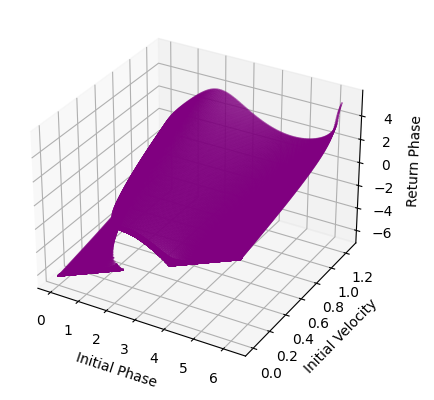

In [5]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Phase')
    ax.scatter(X[:,0], X[:,1], next_impact_phase, c='purple', s=0.1)

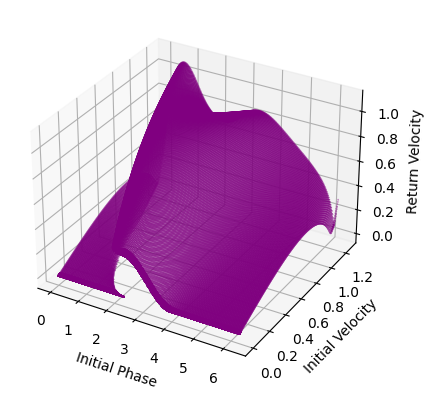

In [6]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], next_impact_velocity, c='purple', s=0.1)
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Velocity')

In [5]:
lower_bounds_init = [np.min(init_impact_velocity), np.min(init_impact_phase)]
upper_bounds_init = [np.max(init_impact_velocity), np.max(init_impact_phase)]
print('Lower init bounds: ', lower_bounds_init)
print('Upper init bounds ', upper_bounds_init)

lower_next_bounds = [np.min(next_impact_velocity), np.min(next_impact_phase)]
upper_next_bounds = [np.max(next_impact_velocity), np.max(next_impact_phase)]
print('Lower next bounds ', lower_next_bounds)
print('Upper next bounds ', upper_next_bounds)

lower_bounds = [min(lower_bounds_init[0], lower_next_bounds[0]), min(lower_bounds_init[1], lower_next_bounds[1]) - 0.1]
upper_bounds = [max(upper_bounds_init[0], upper_next_bounds[0]), max(upper_bounds_init[1], upper_next_bounds[1])]
print('Lower bounds:', lower_bounds)
print('Upper bounds:', upper_bounds)

Lower init bounds:  [0.0, 2e-06]
Upper init bounds  [6.275, 1.25]
Lower next bounds  [2.2232226e-06, -6.2828711]
Upper next bounds  [1.0870663, 5.3092077]
Lower bounds: [0.0, -6.3828711]
Upper bounds: [6.275, 5.3092077]


### Linkage hierarchical clustering to identify potential discontinuities
Here we apply hierarchical linkage clustering and plot the height of the final cluster merge.

Valid clustering methods are: single, complete, average, weighted, centroid, median, and ward. 

Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

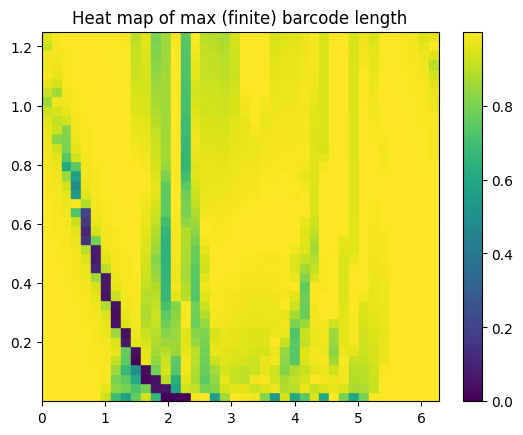

In [4]:
boxes = Boxes(lower_bounds_init, upper_bounds_init, 20)
boxes.plot(init_data, next_data, method='persistence')

diagram:  [[0.         0.08016279]
 [0.         0.08323346]
 [0.         0.11639859]
 [0.         0.14867049]
 [0.         0.21743909]
 [0.         0.23727621]
 [0.         0.25585392]
 [0.         0.32160634]
 [0.         0.45353749]
 [0.                inf]]
max:  0.4535374939441681
Lengths of intervals: [0.08016278594732285, 0.08323346078395844, 0.11639858782291412, 0.148670494556427, 0.21743908524513245, 0.23727621138095856, 0.25585392117500305, 0.3216063380241394, 0.4535374939441681]
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


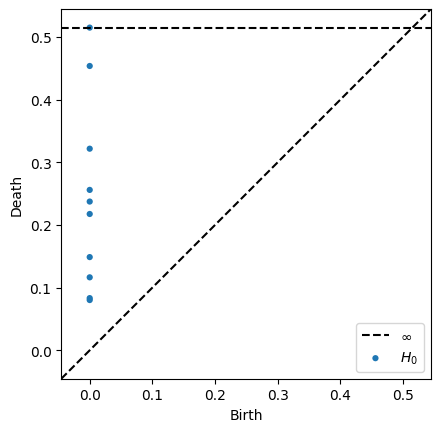

In [9]:
from ripser import ripser
from ripser import Rips

data = np.random.random((10, 2)) 
result = ripser(data, maxdim=0)
diagram = result['dgms'][0]

print('diagram: ', diagram)

#sorted_intervals = sorted(diagram, key=lambda x: x[1] if x[1] != np.inf else float('inf'))

lengths = [death - birth for birth, death in diagram if death != np.inf]

max = max(lengths)

print('max: ', max)

print("Lengths of intervals:", lengths)

rips = Rips(maxdim=0)
rips.plot(diagram)

### Conley-Morse graph

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 131072
Compute_Morse_Graph. B phase_space -> size () == 131072
Total Grid Memory (can be external) = 9961694
Max Memory For Single Grid (must be internal)= 9961694
Max SCC Random Access memory use (must be internal)= 1114112
Max SCC stack memory use (can be external memory) = 488192
 ---- SUMMARY ---- 
Internal Memory Requirement = 11075806
External Memory Requirement = 10449886
Max graph memory size (never stored, however) = 4018328
ConleyIndex: calling RelativeMapHomology.
Dimension 1:
 Matrix is 33 x 33
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

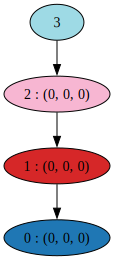

In [6]:
data = np.concatenate((X,Y),axis=1)

subdiv_limit = 10000

k = 0.5

sb = 17

grid = Grid.Grid(lower_bounds, upper_bounds, sb)

id2image = grid.id2image(data)

# Define box map for f
MG_util = CMGDB_util.CMGDB_util()
K=[k, k]
def F(rect):
    return MG_util.F_data(rect, id2image, grid.point2cell, K)

subdiv_init = sb
subdiv_min = sb
subdiv_max = sb
model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, [True, False], F)

morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CMGDB.PlotMorseGraph(morse_graph)

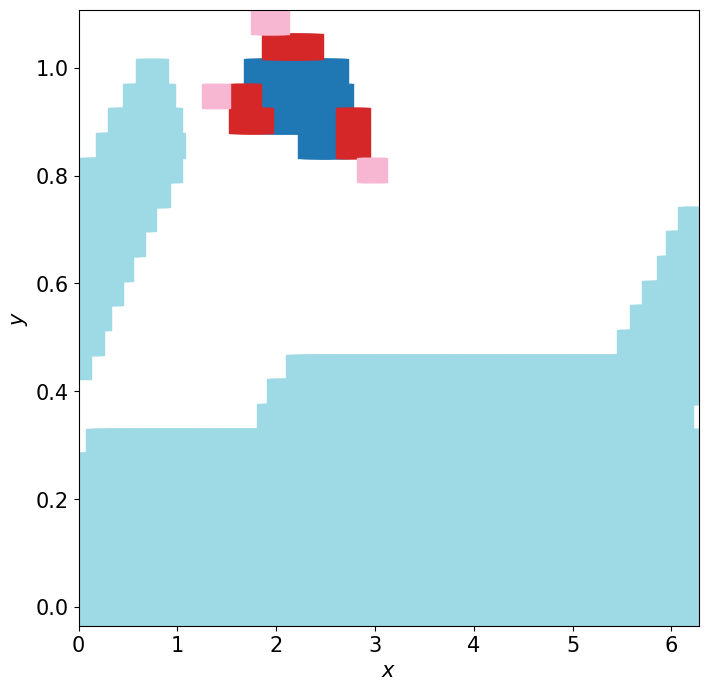

In [11]:
CMGDB.PlotMorseSets(morse_graph)